# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
www.dreamintelligent.com 

# 1-3 Queues


Queue is a type of sequence that only supports `delete_fist` (dequeue) and `insert_last` (enqueue) operations. It is also called "First In First Out" or FIFO. We can easily implement queues using dynamic arrays.

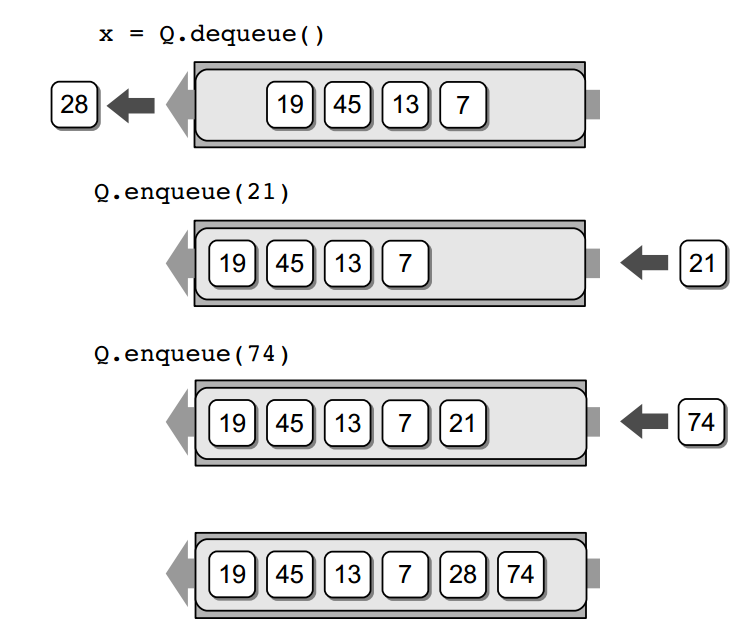

In [1]:
from Array import Dynamic_Array
# Implementation of the Queue ADT using Dynamic Arrays.
class Queue :
     # Creates an empty queue.
     def __init__( self ):
         self._qList = Dynamic_Array()
         # Returns True if the queue is empty.
     
     def isEmpty( self ):
         return len( self ) == 0

     # Returns the number of items in the queue.
     def __len__( self ):
         return len( self._qList )

     # Adds the given item to the queue.
     def enqueue( self, item ):
         self._qList.insert_last( item )

     # Removes and returns the first item in the queue.
     def dequeue( self ):
         assert not self.isEmpty(), "Cannot dequeue from an empty queue."
         return self._qList.delete_first( )

In the above implementation of the queue, we have to shift the elements whenever an element is dequeued. To remedy this problem we have two options: using circular arrays (Exercise 1) or using linked lists. 

## Implementing the queue using a linked list

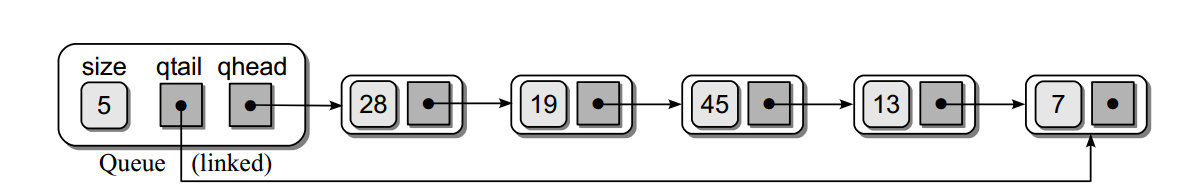

In [2]:
# Implementation of the Queue ADT using a linked list.
class Queue :
    # Creates an empty queue.
    def __init__( self ):
        self._qhead = None
        self._qtail = None
        self._count = 0 
    
    # Returns True if the queue is empty.
    def isEmpty( self ):
        return self._qhead is None

    # Returns the number of items in the queue.
    def __len__( self ):
        return self._count

    # Adds the given item to the queue.
    def enqueue( self, item ):
        node = _QueueNode( item )
        if self.isEmpty() :
            self._qhead = node
        else :
            self._qtail.next = node

        self._qtail = node
        self._count += 1

    # Removes and returns the first item in the queue.
    def dequeue( self ):
        assert not self.isEmpty(), "Cannot dequeue from an empty queue."
        node = self._qhead
        if self._qhead is self._qtail :
            self._qtail = None
        
        self._qhead = self._qhead.next
        self._count -= 1
        return node.item

 # Private storage class for creating the linked list nodes.
class _QueueNode( object ):
    def __init__( self, item ):
        self.item = item
        self.next = None


In [3]:
p=[2,1]
x=p.copy()
x[0]=-1
print(p[0])

2


# Priority queues
Some applications require the use of a queue in which items are assigned a priority
and the items with a higher priority are dequeued first. However, all items with
the same priority still obey the FIFO principle.

A priority queue can be _bounded_ (having only a boundd number of priority values) or _unbounded_ (having possibly infinitely many priority values).

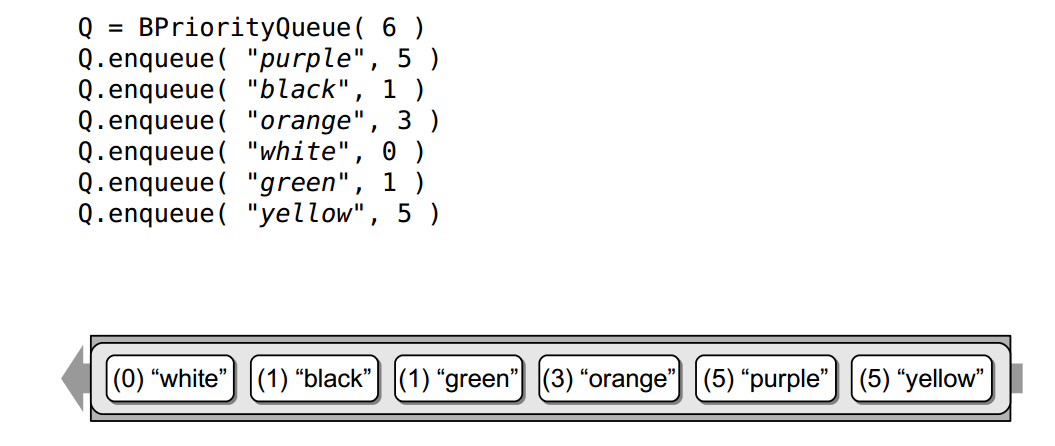

The result of dequeueing
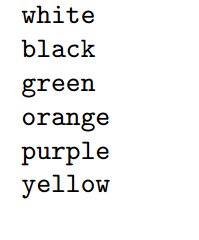


### Implementing priority queues using arrays

We can easily implement priority queues using dynamic arrays, howver for dequeueing we need to search the array to find the one with highest priority.

In [8]:
# Implementation of the unbounded Priority Queue ADT using a Dynamic_Array
# with new items appended to the end.
# Private storage class for associating queue items with their priority.
class _PriorityQEntry( object ):
    def __init__( self, item, priority ):
        self.item = item
        self.priority = priority

class PriorityQueue :
    # Create an empty unbounded priority queue.
    def __init__( self ):
        self._qList = Dynamic_Array() 
    
    # Returns True if the queue is empty.
    def isEmpty( self ):
        return len( self ) == 0

    # Returns the number of items in the queue.
    def __len__( self ):
        return len( self._qList )

    # Adds the given item to the queue.
    def enqueue( self, item, priority ):
        # Create a new instance of the storage class and append it to the list.
        entry = _PriorityQEntry( item, priority )
        self._qList.insert_last( entry )

    # Removes and returns the first item in the queue.
    def dequeue( self ) :
        assert not self.isEmpty(), "Cannot dequeue from an empty queue."

        # Find the entry with the highest priority.
        i=0
        highest_index=0
        highest = self._qList[i].priority
        for i in range( len(self) ) :
            # See if the ith entry contains a higher priority (smaller integer).
            if self._qList[i].priority < highest :
                highest = self._qList[i].priority
                highest_index=i

        # Remove the entry with the highest priority and return the item.
        entry = self._qList.delete_last( )
        return entry.item



In [9]:
Q=PriorityQueue()
Q.enqueue("A", 5)
Q.enqueue("B", 3)
Q.enqueue("C", 0)

while not Q.isEmpty():
    print(Q.dequeue())

C
B
A


## Implementing the bounded priority queue using linked list
If the priority queue is bounded, then we can have a separate queue for each priority value, and we implement each queue by a linked list. We assume that the range of priority values is known in advance. We leave this implementation as an exercise.


Implementation as an array of queues

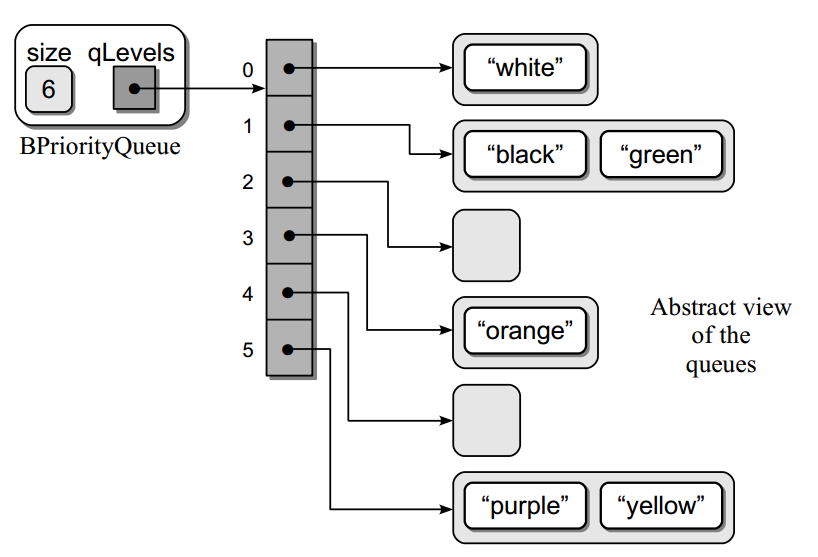

# Application: simulating an airline ticket counter

The simulation involves a number of servers and a number of customers.
The length of the simulation given in number of time units. The simulation
typically begins at time unit zero.
 The number of servers providing the service to the customers. We must have
at least one server.
 The expected service time to complete a transaction.
 The distribution of arrival times, which is used to determine when customers
arrive.


Rule 1: If a customer arrives, he is added to the queue. At most, one customer
can arrive during each time step.
Rule 2: If there are customers waiting, for each free server, the next customer in
line begins her transaction.
Rule 3: For each server handling a transaction, if the transaction is complete, the
customer departs and the server becomes free.

In [11]:
# Used to store and manage information related to an airline passenger.
class Passenger :
    # Creates a passenger object.
    def __init__( self, idNum, arrivalTime ):
        self._idNum = idNum
        self._arrivalTime = arrivalTime 
    
    # Gets the passenger's id number.
    def idNum( self ) :
        return self._idNum

    # Gets the passenger's arrival time.
    def timeArrived( self ) :
        return self._arrivalTime


In [16]:
# Used to store and manage information related to an airline ticket agent.
class TicketAgent :
    # Creates a ticket agent object.
    def __init__( self, idNum ):
        self._idNum = idNum
        self._passenger = None
        self._stopTime = -1 
    # Gets the ticket agent's id number.
    def idNum( self ):
        return self._idNum

    # Determines if the ticket agent is free to assist a passenger.
    def isFree( self ):
        return self._passenger is None

    # Determines if the ticket agent has finished helping the passenger.
    def isFinished( self, curTime ):
        return self._passenger is not None and self._stopTime == curTime

    # Indicates the ticket agent has begun assisting a passenger.
    def startService( self, passenger, stopTime ):
        self._passenger = passenger
        self._stopTime = stopTime

    # Indicates the ticket agent has finished helping the passenger.
    def stopService( self ):
        thePassenger = self._passenger
        self._passenger = None
        return thePassenger


In [3]:
# Implementation of the main simulation class.
from Array import Array
#from llistqueue import Queue
#from people import TicketAgent, Passenger
class TicketCounterSimulation :
    # Create a simulation object.
    def __init__( self, numAgents, numMinutes, betweenTime, serviceTime ):
        # Parameters supplied by the user.
        self._betweenTime=betweenTime
        self._arriveProb = 1.0 / betweenTime
        self._serviceTime = serviceTime
        self._numMinutes = numMinutes


        # Simulation components.
        self._passengerQ = Queue()
        self._theAgents = Array( numAgents )
        for i in range( numAgents ) :
            self._theAgents[i] = TicketAgent(i+1)

        # Computed during the simulation.
        self._totalWaitTime = 0
        self._numPassengers = 0

    # Run the simulation using the parameters supplied earlier.
    def run( self ):
        for curTime in range(self._numMinutes + 1) :
            if not self._passengerQ.isEmpty():
                self._totalWaitTime+=1
            self._handleArrival( curTime )
            self._handleBeginService( curTime )
            self._handleEndService( curTime )
            self.printResults()

    # Print the simulation results.
    def printResults( self ):
        numServed = self._numPassengers - len(self._passengerQ)
        avgWait = float( self._totalWaitTime ) / numServed
        print( "" )
        print( "Number of passengers served = ", numServed )
        print( "Number of passengers remaining in line = %d" %
        len(self._passengerQ) )
        print( "The average wait time was %4.2f minutes." % avgWait )

    # The remaining methods that have yet to be implemented.
    def _handleArrive(self, curTime ): # Handles simulation rule #1.
        #We generate a random number in range(minutesBetween)
        from numpy import randn
        minutesBetween= self._betweenTime #1/self._arriveProb
        randnum=randn(1, minutesBetween)[0]
        
        
        if randnum % minutesBetween==0:
            newCustomer=Passenger(self._numPassengers,  curTime)
            self._passengerQ.enqueue(newCustomer)
            self._numPassengers+=1

           

    def _handleBeginService(self, curTime ): # Handles simulation rule #2.
        for i, agent in enumerate(self._theAgents):
            #if agent.isFinished(curTime):
            #    agent.stopService()
            if agent.isFree():
                if not self._passengerQ.isEmpty():
                    passenger=self._passengerQ.dequeue()
                    agent.startService(passenger, curTime+ self._serviceTime )
            
    
    def _handleEndService(self, curTime ): # Handles simulation rule #3.
        for i, agent in enumerate(self._theAgents):
            if agent.isFinished(curTime):
                agent.stopService()

## Exercises

1- Implement the queue ADT using a circular static array. A circular array allows us to add new items to a queue and remove existing ones without having to shift items in the process. Unfortunately, this approach
introduces the concept of a maximum-capacity queue that can become full. This structure is similar to the one in Exercise 3 in Section 1-1.

New items are added to the queue by inserting them in the position immediately following the back marker.
To dequeue an item, the value in the element marked by front will be returned
and the marker is advanced one position.

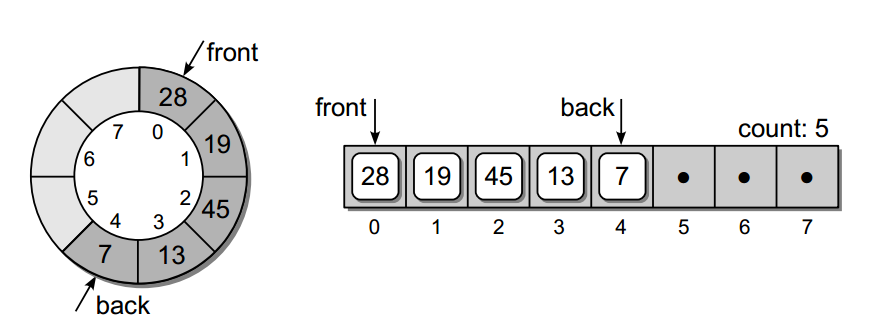
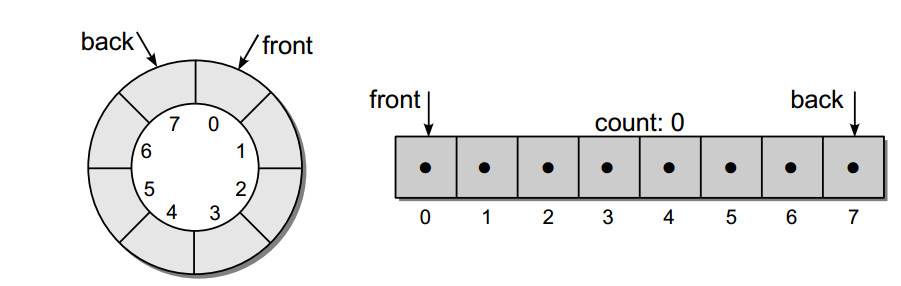

2- Implement the bounded priority queue using an array of linked lists.

3- Run the following code snippet "by hand" (i.e. write down a table of variable values for th iterations of the loop) and write down the contents of the resulting queue.

In [ ]:
values = Queue()
for i in range( 16 ) :
    if i % 3 == 0 :
        values.enqueue( i )
        elif i % 4 == 0 :
            values.dequeue()